In [9]:
#### What is the effect on the quantum noise and the DARM Cavity Pole if we add -23.7 mm  to SR3 RoC?
#### New SRM and new SRC length?

In [1]:
%matplotlib inline
import pykat
import pylab as pl
import numpy as np

### My functions
#from kat_commands import *
from cav_commands import *
from load_kat_data import *
from MMT import modematch

import get_WS
import trace_mode

C:\Users\tvo88\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


                                              ..-
    PyKat 1.1.277         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
katfile = "aLIGO_IFO_AWC_tuning_DCoff_maxtem4_modified.kat"
maxtem = 2

In [85]:
#load the original kat file (ie Perfect Modematching) as a reference
basekat = pykat.finesse.kat() 
basekat.load(katfile)

basekat.parse('''
tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor
# Differentially modulate the strain in the arms
fsig darm  LXarm 1 0 1
fsig darm2 LYarm 1 180 1
qnoisedS NSR_with_RP 1 $fs nOMC_AROC_trans
xaxis darm f log 10 5k 100
yaxis lin re:im
retrace off

''')

basekat.parse('''pd1 signal $fs nOMC_AROC_trans''')
basekat.parse(cav_commands_FC_first)
basekat.parse("maxtem "+str(maxtem))
basekat.undumpify()#undump the vacuum nodes
kat=basekat.deepcopy() #copy kat code
kat.verbose = False

out_orig = kat.run()

### change SR3 ROC is -3 mm/Watt 
### at 7.9 watts input the change is about -23.7 mm
#kat.SR3.Rc.value = kat.SR3.Rc.value - 0.0237
#kat.ls3.L.value = kat.ls3.L.value + 0.01
kat.SRMHR.T.value = 0.30
out_new_ROC = kat.run()

In [86]:
comment ="""##### Testing to trace the modes
#### Turn off all the cav commands except SRCY to extract the eigenmode at the BS
[srcx,srcy] = trace_mode.from_cav_to_BS(kat,'cavSRY')

#### Turn off all the cav commands except XARM to extract the eigenmode at the BS
[ARMx,ARMy] = trace_mode.from_cav_to_BS(kat,'cavXARM')

#### Turn off all the cav commands except OMC to extract the eigenmode at the BS
[OMCx,OMCy] = trace_mode.from_cav_to_BS(kat,'cavOMC')

#### Turn off all the cav commands except FC to extract the eigenmode at the BS
[FCx,FCy] = trace_mode.from_cav_to_BS(kat,'cavFC')"""

C:\Users\tvo88\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


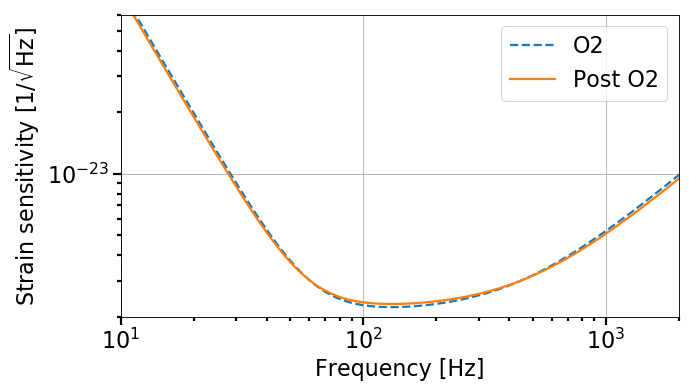

In [87]:
pl.figure(figsize=(9, 5), dpi=80)
pl.subplot(111)

pl.loglog(out_new_ROC.x, out_orig['NSR_with_RP'],'--',linewidth=2, label='O2')
pl.loglog(out_new_ROC.x, out_new_ROC['NSR_with_RP'],linewidth=2, label='Post O2')

#pl.xlim(out_new_ROC.x.min(),out_new_ROC.x.max())
pl.xlim(10,2000)
pl.ylim(2e-24,6e-23)

pl.xlabel("Frequency [Hz]",fontsize=20)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()

C:\Users\tvo88\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


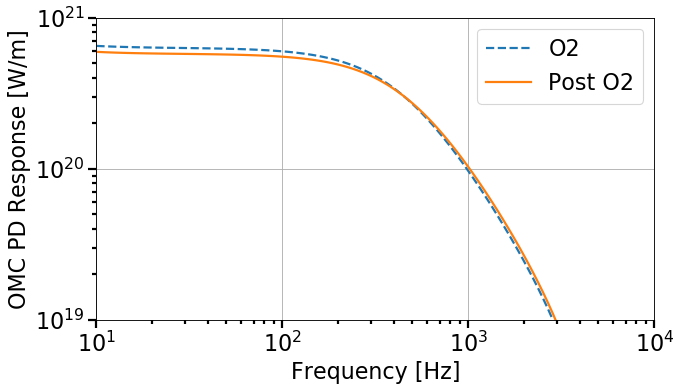

In [88]:
pl.figure(figsize=(9, 5), dpi=80)
pl.subplot(111)

pl.loglog(out_new_ROC.x, ((2*np.pi/1064E-9)*out_orig['signal']),'--',linewidth=2, label='O2')
pl.loglog(out_new_ROC.x,  ((2*np.pi/1064E-9)*out_new_ROC['signal']),linewidth=2, label='Post O2')

pl.xlim(10,10000)
pl.ylim(1e19,1e21)

pl.xlabel("Frequency [Hz]",fontsize=20)
pl.ylabel("OMC PD Response [W/m]",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()

In [89]:
def find_cav_pole(freq,data):
    ### Find Cavity pole
    dc_level = data[0]
    
    sn_pole = dc_level*0.7071
    
    pole_index = np.where( data < sn_pole )
    pole_index = pole_index[0].min()

    
    print("Cavity pole is " +str(round( freq[pole_index])))
    
find_cav_pole(out_new_ROC.x,out_orig['signal'])
find_cav_pole(out_new_ROC.x,out_new_ROC['signal'])

Cavity pole is 269.0
Cavity pole is 305.0
